In [462]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [463]:
df = pd.read_csv("1_Merged_Cleaned.csv")

In [464]:
df.head()

,Date,Price,Qty,TotalAmount,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income,Day,Month,Year
0,2022-01-01,7500,4,30000,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53",1,1,2022
1,2022-01-01,10000,7,70000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58",1,1,2022
2,2022-01-01,8800,4,35200,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18",1,1,2022
3,2022-01-01,8800,7,61600,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57",1,1,2022
4,2022-01-01,10000,1,10000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95",1,1,2022


In [465]:
df_grouped = df.groupby("Date")["Qty"].sum()

In [466]:
# df_grouped = np.log(df_grouped)

# Step 1: Mengecek _tren_ dari data

## Metode Pertama:
### Plot

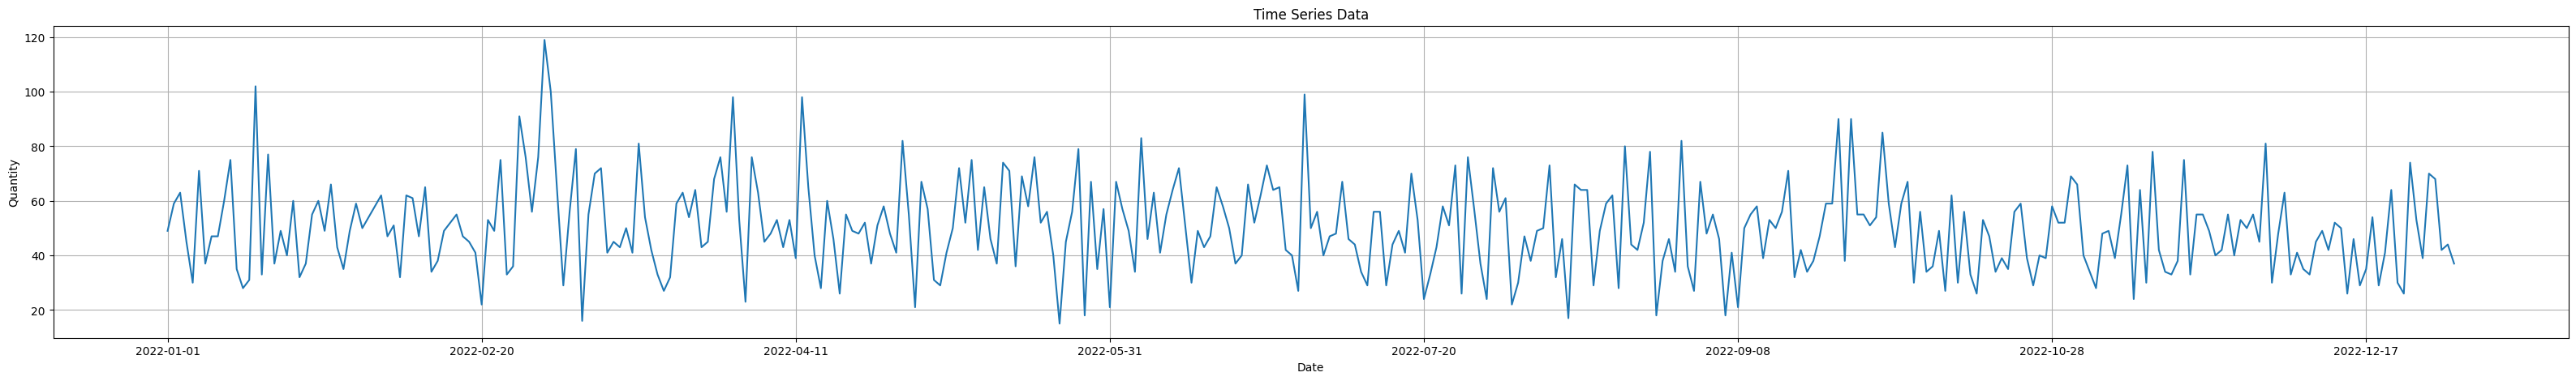

In [467]:
plt.figure(figsize=(40,5))
df_grouped.plot()
plt.grid()
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Time Series Data")
plt.show()

In [468]:
train_percentage = 0.8

split_index = int(len(df_grouped) * train_percentage)

train = df_grouped[:split_index]
test = df_grouped[split_index:]

print("Train set size:", len(train))
print("Test set size:", len(test))

Train set size: 292
Test set size: 73


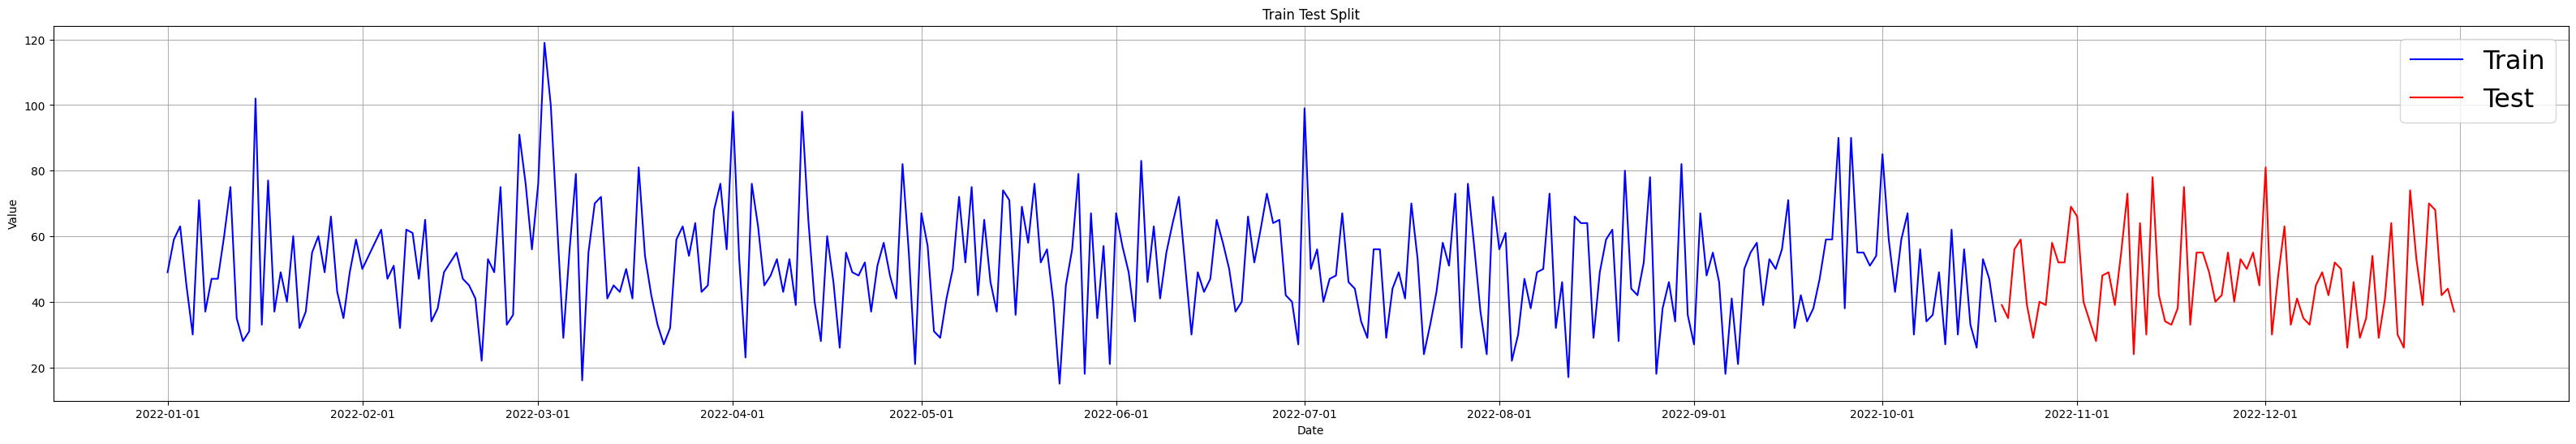

In [469]:
plt.figure(figsize=(40, 6))
plt.plot(train.index, train, color='blue', label='Train')
plt.plot(test.index, test, color='red', label='Test')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train Test Split')
plt.legend(fontsize=23)
plt.grid()
plt.show()

# Melanjutkan mengecek dataset (apalagi bagian train)
## Metode Kedua:
### ACF (Auto-correlation Function) dan PACF (Partial auto-correlation Function)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


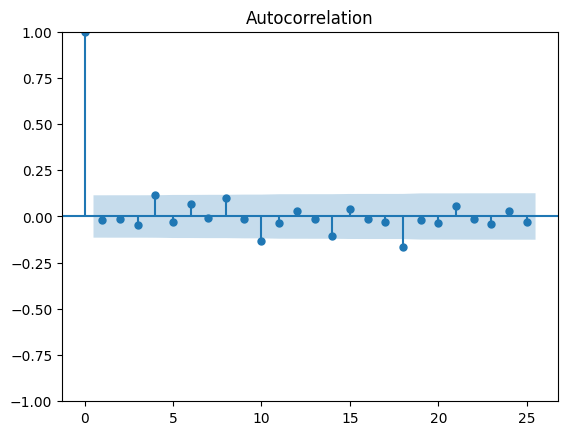

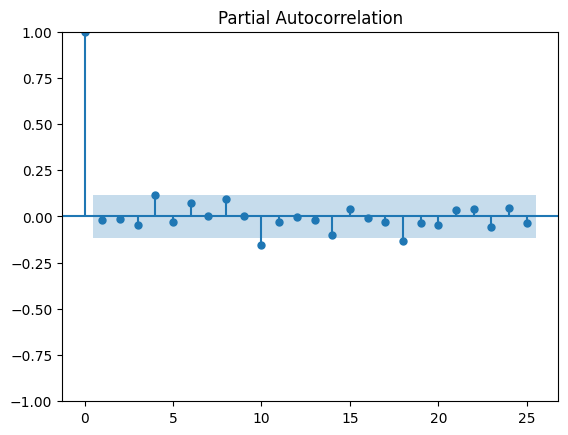

In [470]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train)
pacf_original = plot_pacf(train)

Perhatikan bahwa _drop value_ nya sangat cepat

## Metode Ketiga:
### ADF Test

In [471]:
from statsmodels.tsa.stattools import adfuller

# Perhatikan bahwa p valuenya sangat kecil (dibawah 5%)
adf_test = adfuller(train)
print(f'p-value: {adf_test[1]}')

p-value: 5.565471663498405e-30


#### Perhatikan bahwa kita bisa mengambil kesimpulan bahwa model yang digunakan akan ARIMA(p,0,q) karena data yang digunakan stasioner (kita bisa mengatakan begitu karena plot dan statistical test yang telah digunakan)

# Step 3: Fitting ARIMA Model

In [472]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(4,0,4))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1236.890
Date:                Tue, 18 Jul 2023   AIC                           2493.781
Time:                        14:43:17   BIC                           2530.548
Sample:                    01-01-2022   HQIC                          2508.508
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0164      1.094     46.617      0.000      48.871      53.161
ar.L1         -0.2688      0.050     -5.366      0.000      -0.367      -0.171
ar.L2          1.0889      0.052     20.814      0.0

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Step 4: Cek Model:

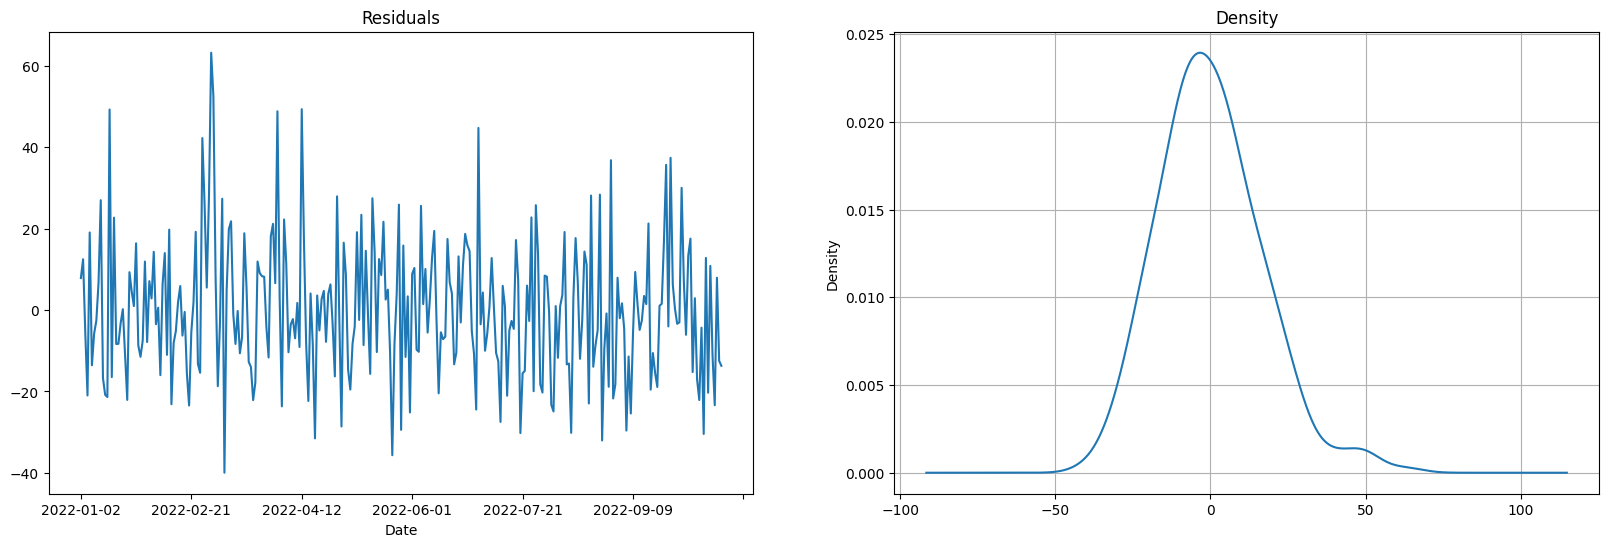

In [473]:
residual = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(title="Density", kind="kde", ax=ax[1])
plt.grid()
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


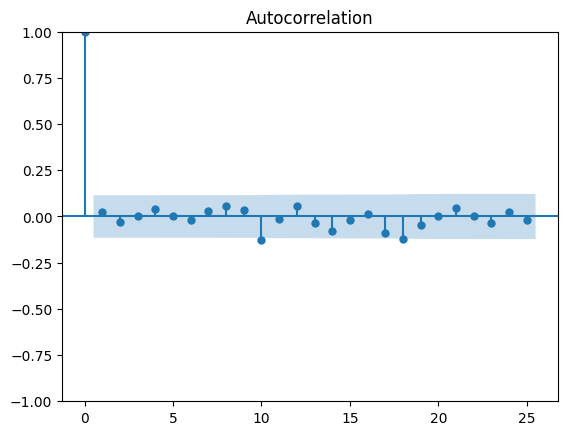

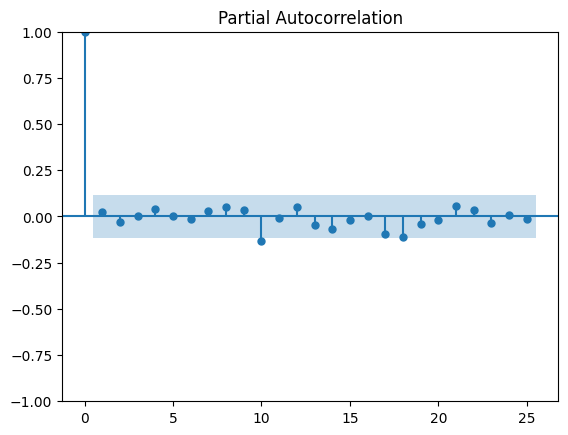

In [474]:
acf_residual = plot_acf(residual)
pacf_residual = plot_pacf(residual)

In [475]:
forecast_test = model_fit.forecast(len(test))

In [476]:
len(np.unique(forecast_test))

73

<AxesSubplot:xlabel='Date'>

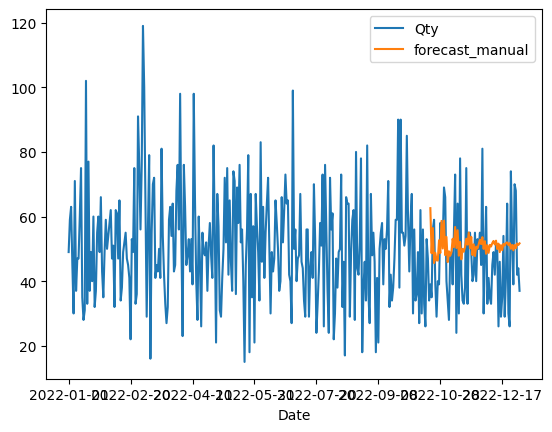

In [477]:
df_grouped = df_grouped.to_frame()

df_grouped["forecast_manual"] = [None]*len(train) + list(forecast_test)
df_grouped.plot()

Perhatikan bahwa hanya ada 1 _unique value_ disini, mari kita coba Autofit ARIMA Model

# Step 5: Autofit ARIMA

In [478]:
import pmdarima as pm

auto_arima = pm.auto_arima(train, stepwise=True, seasonal=True)
auto_arima

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [479]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:                        SARIMAX   Log Likelihood               -1245.264
Date:                Tue, 18 Jul 2023   AIC                           2494.528
Time:                        14:43:18   BIC                           2501.882
Sample:                    01-01-2022   HQIC                          2497.474
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     51.0205      1.069     47.722      0.000      48.925      53.116
sigma2       296.2872     22.615     13.102      0.000     251.963     340.611
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                19.60
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.55
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Step 6 Model Prediction Evaluation

In [480]:
forecast_auto = auto_arima.predict(n_periods=len(test))
df_grouped["forecast_auto"] = [None]*len(train) + list(forecast_auto)

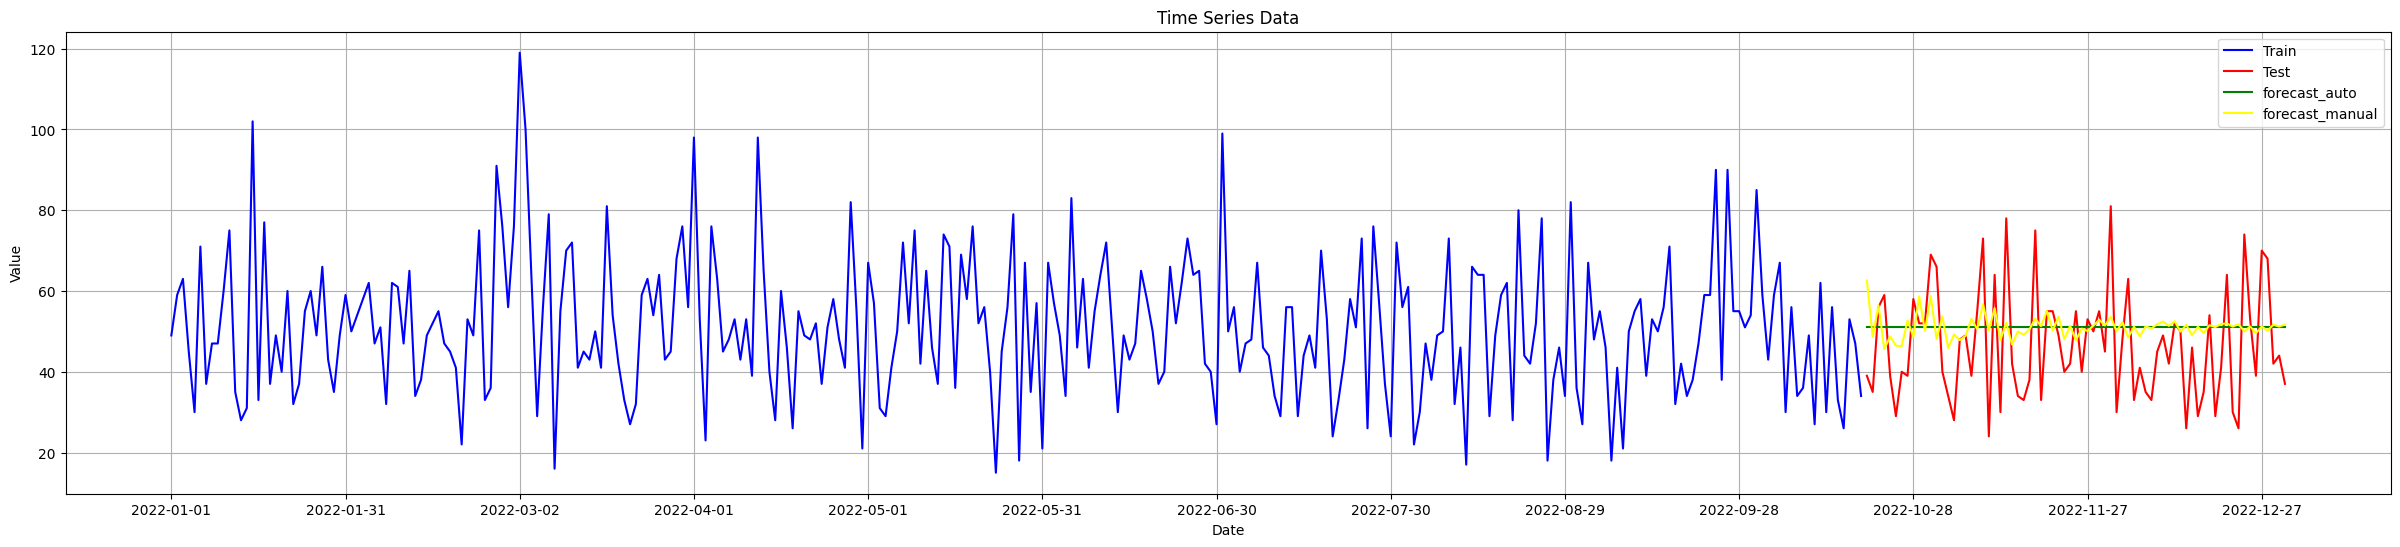

In [481]:
fig, ax = plt.subplots(figsize=(30, 6))

# Plot train and test data
ax.plot(train.index, train, color='blue', label='Train')
ax.plot(test.index, test, color='red', label='Test')

# Plot forecast data
df_grouped["forecast_auto"].plot(ax=ax, color='green')
df_grouped["forecast_manual"].plot(ax=ax, color='yellow')

# Set labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Data')
ax.legend()

# Adjust x-axis tick labels
n = 12
x_ticks = ax.get_xticks()
step = max(1, len(x_ticks) // n)
ax.set_xticks(x_ticks[::step])

# Display the plot
plt.grid()
plt.show()

In [484]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, df_grouped["forecast_auto"][-len(test):]))
print("RMSE auto forecast:", rmse)

rmse = np.sqrt(mean_squared_error(test, df_grouped["forecast_manual"][-len(test):]))
print("RMSE manual forecast:", rmse)

RMSE auto forecast: 14.499119947927959
RMSE manual forecast: 14.09259288423011


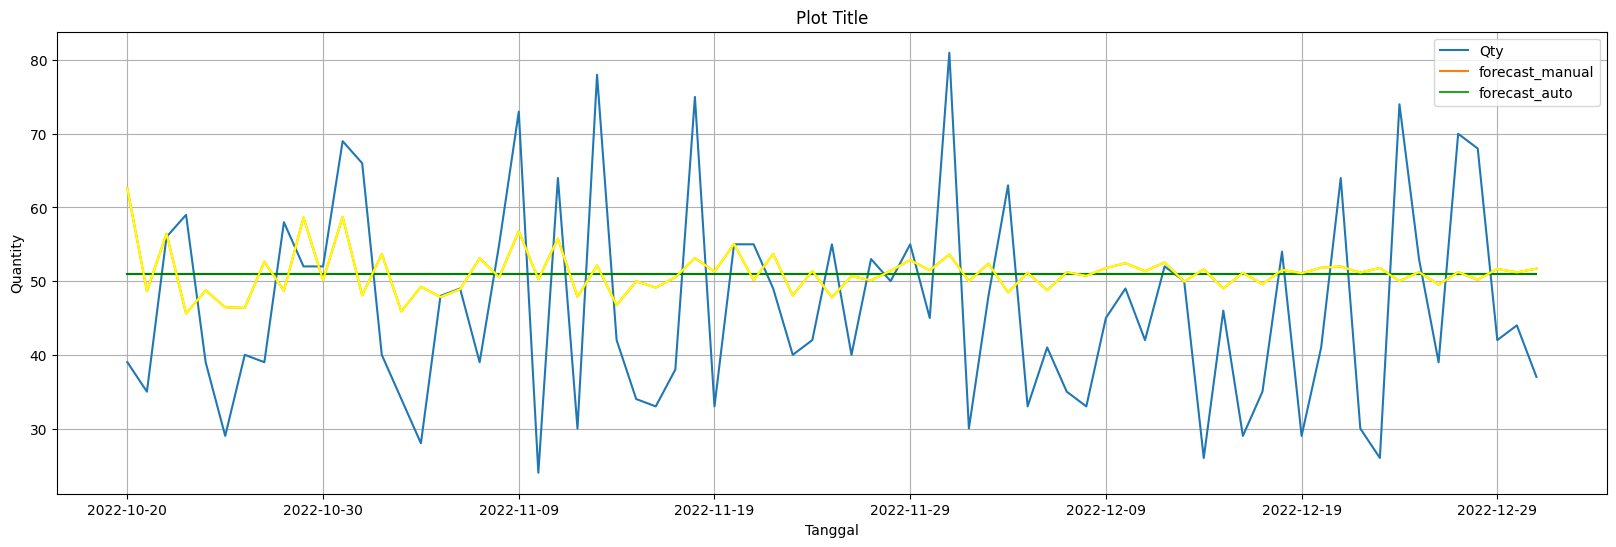

In [518]:
# Create the plot
fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the width (12) and height (6) as desired

# Plot the data
df_grouped[-len(test):].plot(ax=ax)
df_grouped["forecast_auto"][-len(test):].plot(ax=ax, color='green')
df_grouped["forecast_manual"][-len(test):].plot(ax=ax, color='yellow')

# Add any necessary plot configurations (e.g., labels, title, legend)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Quantity')
ax.set_title('Plot Title')
plt.grid()
plt.show()

Perhatikan model yang telah kita buat dengan manual, pada saat quantity sesungguhnya naik, model yang kita buat juga naik. Begitu juga saat quantitiy sesungguhnya turun